In [11]:
import json

with open("COCO/train_val_annotations-2/captions_val2014.json") as f:
    data = json.load(f)
    print(data.keys())
    print(data['annotations'][0])

dict_keys(['info', 'images', 'licenses', 'annotations'])
{'image_id': 203564, 'id': 37, 'caption': 'A bicycle replica with a clock as the front wheel.'}


In [67]:
from gensim.models.keyedvectors import Word2VecKeyedVectors
from gensim.models import KeyedVectors
def load_word_vectors(fname):
    model = KeyedVectors.load_word2vec_format(fname, binary=False)
    vecs = model.vectors
    words = list(model.vocab.keys())
    return model, vecs, words

model, vecs, words = load_word_vectors(fname = "../generation_debias/nullspace_projection/data/embeddings/vecs.filtered.txt")

In [14]:
print(type(model))

<class 'gensim.models.keyedvectors.Word2VecKeyedVectors'>


In [25]:
# frequency analysis
# embedding cluster
token = {}
print(len(data['annotations']))
for i in range(len(data['annotations'])):
    tokens = data['annotations'][i]['caption'].split(' ')
    for t in tokens:
        if t in model.vocab.keys():
            if t not in token.keys():
                token[t] = 0
            token[t] += 1

202654


In [38]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [32]:
sorted_token = sorted(token.items(), key=lambda s:-s[1])

In [91]:
selected = sorted_token[50:150]
print(selected)
v, w = [], []
for a, b in selected:
    v.append(model[a])
    w.append(a)
v = np.array(v)

[('blue', 4502), ('baseball', 4424), ('sign', 4234), ('green', 4219), ('parked', 4206), ('bathroom', 4126), ('looking', 3919), ('bus', 3840), ('side', 3775), ('clock', 3737), ('for', 3725), ('kitchen', 3657), ('couple', 3613), ('pizza', 3608), ('it', 3598), ('field', 3577), ('wearing', 3406), ('food', 3395), ('boy', 3384), ('other', 3305), ('over', 3302), ('sits', 3262), ('flying', 3213), ('player', 3190), ('from', 3179), ('water', 3165), ('men', 3148), ('her', 3142), ('out', 3118), ('laying', 3110), ('bed', 3051), ('wooden', 2992), ('girl', 2991), ('toilet', 2943), ('city', 2927), ('grass', 2900), ('their', 2861), ('through', 2857), ('snow', 2832), ('brown', 2787), ('yellow', 2749), ('eating', 2634), ('picture', 2614), ('as', 2606), ('building', 2588), ('bear', 2559), ('around', 2555), ('one', 2531), ('bench', 2500), ('horse', 2460), ('ball', 2427), ('giraffe', 2421), ('living', 2408), ('beach', 2382), ('each', 2368), ('covered', 2366), ('laptop', 2318), ('under', 2301), ('skateboard'

In [88]:
selected = ["man", "woman", "aunt", "uncle", "brother", "sister", "sir", "madam", "nephew", "niece"]
v, w = [], []
for a in selected:
    v.append(model[a])
    w.append(a)
v = np.array(v)

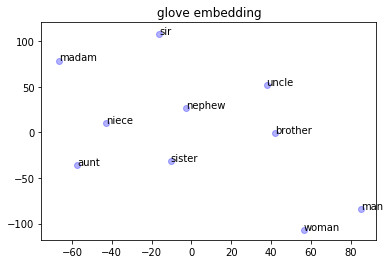

In [90]:
# tsne_before = tsne(all_significantly_biased_vecs[:M], all_significantly_biased_labels[:M], title = "Original (t=0)", ind2label =ind2label )
n = len(v)
tsne = TSNE(n_components=2, init='pca', perplexity=5, learning_rate=50)#, angle = 0.5, perplexity = 20)
vecs_2d = tsne.fit_transform(v)

for i in range(n):
    plt.scatter(vecs_2d[i, 0], vecs_2d[i, 1], c="blue", alpha = 0.3, marker = "o")
    plt.annotate(w[i], xy=(vecs_2d[i, 0], vecs_2d[i, 1]), xytext=(vecs_2d[i, 0] + 0.001, vecs_2d[i, 1] + 0.001))

# label_names = sorted(list(set(labels.tolist())))
# num_labels = len(label_names)

# names = sorted(set(labels.tolist()))

# plt.figure(figsize=(6, 5))
# colors = "red", "blue"
# for i, c, label in zip(sorted(set(labels.tolist())), colors, names):
    
# plt.legend(loc = "upper right")

plt.title("glove embedding")
plt.savefig("embeddings_glove_sim.png", dpi=600)
plt.show()

In [57]:
import torch
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/Users/wuchiyu/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/wuchiyu/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/wuchiyu/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/wuchiyu/anaconda3/lib/python3.7/site-packages/tensorflow/python/frame

In [133]:
v_bert = [[] for ii in range(len(w))]
for ii in range(50):
    text = data['annotations'][ii]['caption']
    print(text)
    marked_text = "[CLS] " + text + " [SEP]"
    tokenized_text = tokenizer.tokenize(marked_text)    # Split the sentence into tokens.
#     print (tokenize_text)

    # Map the token strings to their vocabulary indeces.
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

    # Mark each of the 22 tokens as belonging to sentence "1".
    segments_ids = [1] * len(tokenized_text)

    # Convert inputs to PyTorch tensors
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensors = torch.tensor([segments_ids])

    # Load pre-trained model (weights)
    model_bert = BertModel.from_pretrained('bert-base-uncased', output_hidden_states = True,) # Whether the model returns all hidden-states.

    # Put the model in "evaluation" mode, meaning feed-forward operation.
    model_bert.eval()
    with torch.no_grad():
        outputs = model_bert(tokens_tensor, segments_tensors)
    
    for i, token_str in enumerate(tokenized_text):
        if token_str in w:
            idx = w.index(token_str)
            print(outputs[0][0][i].shape, ii, i)
            v_bert[idx].append(outputs[0][0][i].detach().numpy())
            

A bicycle replica with a clock as the front wheel.
torch.Size([768]) 0 6
torch.Size([768]) 0 7
A black Honda motorcycle parked in front of a garage.
torch.Size([768]) 1 4
torch.Size([768]) 1 5
A room with blue walls and a white sink and door.
torch.Size([768]) 2 4
torch.Size([768]) 2 9
A car that seems to be parked illegally behind a legally parked car
torch.Size([768]) 3 2
torch.Size([768]) 3 7
torch.Size([768]) 3 9
torch.Size([768]) 3 12
torch.Size([768]) 3 13
A large passenger airplane flying through the air.
torch.Size([768]) 4 5
torch.Size([768]) 4 6
torch.Size([768]) 4 8
There is a GOL plane taking off in a partly cloudy sky.
Blue and white color scheme in a small bathroom.
torch.Size([768]) 6 1
torch.Size([768]) 6 9
This is a blue and white bathroom with a wall sink and a lifesaver on the wall.
torch.Size([768]) 7 4
torch.Size([768]) 7 7
torch.Size([768]) 7 11
A blue boat themed bathroom with a life preserver on the wall
torch.Size([768]) 8 2
torch.Size([768]) 8 3
torch.Size([76

In [69]:
print(outputs[0].shape, outputs[1].shape)

torch.Size([1, 6, 768]) torch.Size([1, 768])


In [134]:
v_new = []
w_new = []
for ww in range(len(w)):
    for vv in range(len(v_bert[ww])):
        v_new.append(v_bert[ww][vv])
        w_new.append(w[ww])
        break
print(w_new)

['blue', 'green', 'parked', 'bathroom', 'bus', 'clock', 'for', 'kitchen', 'field', 'food', 'sits', 'flying', 'from', 'water', 'toilet', 'city', 'grass', 'through', 'brown', 'eating', 'as', 'bench', 'horse', 'very', 'behind', 'open', 'motorcycle', 'old', 'road', 'car', 'inside', 'air', 'sink', 'boat', 'different']


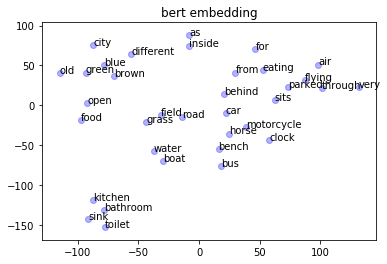

In [135]:
# tsne_before = tsne(all_significantly_biased_vecs[:M], all_significantly_biased_labels[:M], title = "Original (t=0)", ind2label =ind2label )
n = len(v_new)
tsne = TSNE(n_components=2, init='pca', perplexity=5, learning_rate=50)#, angle = 0.5, perplexity = 20)
vecs_2d = tsne.fit_transform(v_new)

for i in range(n):
    plt.scatter(vecs_2d[i, 0], vecs_2d[i, 1], c="blue", alpha = 0.3, marker = "o")
    plt.annotate(w_new[i], xy=(vecs_2d[i, 0], vecs_2d[i, 1]), xytext=(vecs_2d[i, 0] + 0.001, vecs_2d[i, 1] + 0.001))

# label_names = sorted(list(set(labels.tolist())))
# num_labels = len(label_names)

# names = sorted(set(labels.tolist()))

# plt.figure(figsize=(6, 5))
# colors = "red", "blue"
# for i, c, label in zip(sorted(set(labels.tolist())), colors, names):
    
# plt.legend(loc = "upper right")

plt.title("bert embedding")
plt.savefig("embeddings_bert.png", dpi=600)
plt.show()

In [114]:
text1 = "I run by the river bank every day"
text2 = "I took money from the local bank"

marked_text1 = "[CLS] " + text1 + " [SEP]"
marked_text2 = "[CLS] " + text2 + " [SEP]"
tokenized_text1 = tokenizer.tokenize(marked_text1)    # Split the sentence into tokens.
tokenized_text2 = tokenizer.tokenize(marked_text2)    # Split the sentence into tokens.
#     print (tokenize_text)

# Map the token strings to their vocabulary indeces.
indexed_tokens1 = tokenizer.convert_tokens_to_ids(tokenized_text1)
indexed_tokens2 = tokenizer.convert_tokens_to_ids(tokenized_text2)

# Mark each of the 22 tokens as belonging to sentence "1".
segments_ids1 = [1] * len(tokenized_text1)
segments_ids2 = [1] * len(tokenized_text2)

# Convert inputs to PyTorch tensors
tokens_tensor1 = torch.tensor([indexed_tokens1])
segments_tensors1 = torch.tensor([segments_ids1])

tokens_tensor2 = torch.tensor([indexed_tokens2])
segments_tensors2 = torch.tensor([segments_ids2])

# Load pre-trained model (weights)
model_bert = BertModel.from_pretrained('bert-base-uncased', output_hidden_states = True,) # Whether the model returns all hidden-states.

# Put the model in "evaluation" mode, meaning feed-forward operation.
model_bert.eval()
with torch.no_grad():
    outputs1 = model_bert(tokens_tensor1, segments_tensors1)
    outputs2 = model_bert(tokens_tensor2, segments_tensors2)
    
idx1, idx2 = -1, -1
for i, token_str in enumerate(tokenized_text1):
    if token_str == "bank":
        idx1 = i
        break

for i, token_str in enumerate(tokenized_text2):
    if token_str == "bank":
        idx2 = i
        break
v_new.append(outputs1[0][0][idx1].detach().numpy())
v_new.append(outputs2[0][0][idx2].detach().numpy())
w_new.append("river_bank")
w_new.append("local_bank")
x1 = outputs1[0][0][idx1].detach().numpy()
x2 = outputs2[0][0][idx2].detach().numpy()
print(x1.dot(x2)/np.linalg.norm(x1)/np.linalg.norm(x2))

0.40171546


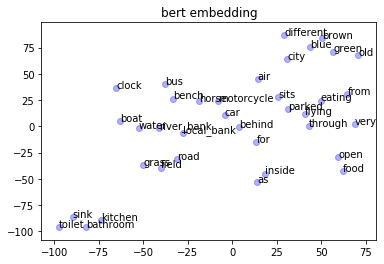

In [132]:
# tsne_before = tsne(all_significantly_biased_vecs[:M], all_significantly_biased_labels[:M], title = "Original (t=0)", ind2label =ind2label )
n = len(v_new)
tsne = TSNE(n_components=2, init='pca', perplexity=5, learning_rate=50)#, angle = 0.5, perplexity = 20)
vecs_2d = tsne.fit_transform(v_new)

for i in range(n):
    plt.scatter(vecs_2d[i, 0], vecs_2d[i, 1], c="blue", alpha = 0.3, marker = "o")
    plt.annotate(w_new[i], xy=(vecs_2d[i, 0], vecs_2d[i, 1]), xytext=(vecs_2d[i, 0] + 0.001, vecs_2d[i, 1] + 0.001))

# label_names = sorted(list(set(labels.tolist())))
# num_labels = len(label_names)

# names = sorted(set(labels.tolist()))

# plt.figure(figsize=(6, 5))
# colors = "red", "blue"
# for i, c, label in zip(sorted(set(labels.tolist())), colors, names):
    
# plt.legend(loc = "upper right")

plt.title("bert embedding")
plt.savefig("embeddings_bert_bank.png", dpi=600)
plt.show()